#1.Introduction to CAPM

* Capital Asset Pricing Model (CAPM) is probably the most widely used model in assets pricing.
* It is a one-factor linear model.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats


We will use stats.linregress() to estimate the one-factor linear model. The linregress() estimates a simple linear regression.

Details of the function is at
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html



In [2]:
# Let's build a linear model on a simulated data first
y=[1,2,3,4,2,3,4]
x=range(1,8)
(beta, alpha, r_value, p_value, std_err) =stats.linregress(x,y)
print("beta=",beta)
print("alpha=",alpha)

beta= 0.3571428571428571
alpha= 1.285714285714286



**The beta (market risk) estimation**



*   According to the CAPM, the expected returns of a stock are linearly correlated with expected market returns.
*   The meaning of beta is that when the expected market risk-premium increases by 1%, the individual stock's expected return would increase by β%, vice versa
* The average beta of all stocks is
one. Thus, if a stock's beta is higher than 1, it means that its market risk is higher than
that of an average stock.
* We can use scipy.stats.linregress() to estimate the β value where the risk-free rate is ignored. See equation belows.

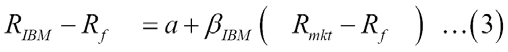







Detail of the function is at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [3]:
stock_ret = [0.065, 0.0265, -0.0593, -0.001,0.0346]  # x
mkt_ret = [0.055, -0.09, -0.041,0.045,0.022] # y
(beta, alpha, r_value, p_value, std_err) = stats.linregress(x=mkt_ret,y=stock_ret)

print("Beta =", beta )
print("R-squared =", r_value**2)
print("p-value =", p_value) #The p-value for a hypothesis test whose null hypothesis is that the slope is zero


Beta = 0.29126075247731853
R-squared = 0.1478856629663111
p-value = 0.5227155239089462


In [4]:
!pip install yfinance

In [5]:
# use yfinance library to download finance data from Yahoo! Finance
import yfinance as yf

**Normalize stock data based on its initial price**.


$r_t =  \frac{P_t}{P_{0}}  $

In [6]:
begdate= '2012-01-05'
enddate= '2016-12-31'

dataIBM = yf.download('IBM',begdate,enddate)
dataIBM

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-05,176.682602,176.892929,175.047806,176.539200,113.201233,4668403
2012-01-06,176.281067,176.367111,174.292542,174.512421,111.901634,5122367
2012-01-09,174.187378,174.254303,172.342255,173.604202,111.319229,5440455
2012-01-10,175.172089,175.640533,173.231354,173.336517,111.147560,5398406
2012-01-11,172.782028,174.770554,172.562134,174.302109,111.766769,4299897
...,...,...,...,...,...,...
2016-12-23,159.655838,160.124283,159.130020,159.378586,116.319519,1779455
2016-12-27,159.636703,160.592728,159.512421,159.789673,116.619545,1461785
2016-12-28,159.933075,160.363297,158.699814,158.881454,115.956696,1838345


In [7]:
begdate= '2012-01-05'
enddate= '2016-12-31'

dataIBM = yf.download('IBM',begdate,enddate)['Adj Close']
# Normalize stock data based on its initial price.
# After the division, we subtract 1 from the resulting values. This gives the "return" or percentage change from the initial price for each of the subsequent prices.
# Example: 1.05 - 1 → 0.05 (or a 5% increase from the initial price)
retIBM = dataIBM[1:]/dataIBM[0]-1
dataMkt =  yf.download('^GSPC',begdate,enddate)['Adj Close'] ## ** need a ticker name for the SET price index
retMkt = dataMkt[1:]/dataMkt[0]-1

(beta,alpha,r_value,p_value,std_err)=stats.linregress(x=retMkt, y=retIBM)
print("Beta=",beta)
print("R-squared=", r_value**2)
print("p-value =", p_value)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta= -0.2675106461621532
R-squared= 0.3622807902663038
p-value = 1.4898051300720429e-124


**Using the log return of a stock**

$r_t = \ln \left( \frac{P_t}{P_{t-1}} \right)$

In [ ]:
begdate= '2012-01-05'
enddate= '2016-12-31'

dataIBM = yf.download('IBM',begdate,enddate)['Adj Close']
# Normalize stock data based on its initial price.
# After the division, we subtract 1 from the resulting values. This gives the "return" or percentage change from the initial price for each of the subsequent prices.
# Example: 1.05 - 1 → 0.05 (or a 5% increase from the initial price)
logretIBM = np.log(dataIBM[1:].values / dataIBM[:-1].values)
dataMkt =  yf.download('^GSPC',begdate,enddate)['Adj Close'] ## ** need a ticker name for the SET price index
logretMkt =np.log(dataMkt[1:].values / dataMkt[:-1].values)

(beta,alpha,r_value,p_value,std_err)=stats.linregress(x=logretMkt, y=logretIBM)
print("Beta=",beta)
print("R-squared=", r_value**2)
print("p-value =", p_value)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta= 0.8804380414897561
R-squared= 0.3631875062732439
p-value = 6.101824176149505e-125


**Exercise 1**

Estimate Walmart's beta (market risk) in the period from 01/01/2012 to 31/12/2017. Ticker name for Walmart is "wmt". Use the log return of a stock.

In [8]:
## Enter your code here

begdate= '2012-01-01'
enddate= '2017-12-31'

dataIBM = yf.download('WMT',begdate,enddate)['Adj Close']
# Normalize stock data based on its initial price.
# After the division, we subtract 1 from the resulting values. This gives the "return" or percentage change from the initial price for each of the subsequent prices.
# Example: 1.05 - 1 → 0.05 (or a 5% increase from the initial price)
logretIBM = np.log(dataIBM[1:].values / dataIBM[:-1].values)
dataMkt =  yf.download('^GSPC',begdate,enddate)['Adj Close'] ## ** need a ticker name for the SET price index
logretMkt =np.log(dataMkt[1:].values / dataMkt[:-1].values)

(beta,alpha,r_value,p_value,std_err)=stats.linregress(x=logretMkt, y=logretIBM)
print("Beta=",beta)
print("R-squared=", r_value**2)
print("p-value =", p_value)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta= 0.552175930226547
R-squared= 0.15385173553069048
p-value = 1.2162558904021245e-56


#2. Moving beta

Moving beta is a beta time series based on, an x-year moving window. (such as 1-year moving window).
The return represents the percentage change from one period to the next.

In [ ]:
def ret_f(ticker,begdate, enddate):
    data = yf.download(ticker,begdate,enddate)['Adj Close'] # get adjusted pricing data for a given ticker
    ret_moving = (data[1:].values-data[:-1].values)/data[:-1].values # [price(t) - price(t-1)]/price(t-1)
    dates = data.index # Extract dates for further use
    return ret_moving, dates

In [ ]:
begdate= '2010-01-01'
enddate= '2016-12-31'
ret_f('IBM',begdate,enddate)

In [ ]:
y0, dates =pd.Series(ret_f('IBM',begdate,enddate))
y0

[*********************100%%**********************]  1 of 1 completed


array([-0.01148056, -0.00520428, -0.00154193, ..., -0.00568406,
        0.00246712, -0.00366135])

In [ ]:
y1  =pd.Series(ret_f('IBM',begdate,enddate))
y1

In [ ]:
begdate= '2010-01-01'
enddate= '2016-12-31'
y0, dates =pd.Series(ret_f('IBM',begdate,enddate))
x0, dates =pd.Series(ret_f('^GSPC',begdate,enddate))

# a year to build a 1-year history data (e.g. in the output, the beta for year 2011 were estimated from data in year 2010)
lag_year=dates[0].strftime("%Y") #start at the  first year

y1=[]
x1=[]
beta=[]

print("Year Beta   p_value")
for i in np.arange(1,len(dates)-1): #for each price
  year=dates[i].strftime("%Y")

  if(year==lag_year):
    x1.append(x0[i]) #if we are reading the current lag year, append the data
    y1.append(y0[i])
  else: # if we read the data from a year after lag year, use the x1 and y1 arrays to estimate the beta for the lag year

    (beta,alpha,r_value,p_value,std_err)=stats.linregress(y1,x1) #estimate beta and alpha using data from the lag year
    beta=round(beta,3) # round to the given number of decimals.
    p_vaue=round(p_value,3)
    print(year, beta ,p_value)
    x1=[] # clear the  array to store data for the next year
    y1=[]
    lag_year=year #set the new lag year


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Year Beta   p_value
2011 0.8 6.910577133153607e-54
2012 0.813 4.961454227453815e-53
2013 0.535 2.7360978650469344e-34
2014 0.258 2.2535409312478296e-13
2015 0.321 2.848114786513305e-16
2016 0.544 3.0638862356240396e-45


# 3. Scholes and William adjusted beta

* Beta has a mean-reverting tendency. It means that if this period's beta is less than 1, there is a good chance that the next beta would be higher. On the other hand, if the current beta is higher than 1, the next beta might be smaller.
* Many researchers find that $β$ would have an upward bias for frequently traded
stocks and a downward bias for infrequently traded stocks. To overcome this, Sholes and Williams recommend the following adjustment.


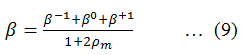

Here, $β$ is the stock or portfolio beta and $ρ_m$ is the autocorrelation for the market return. The three betas in the preceding formula are defined by the following three equations:

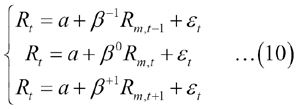


The formula needs time-shift data (forward and backward data). So let's practice shifting data first

In [ ]:

x=np.arange(1,5,0.5)
y=pd.DataFrame(x,columns=['Ret']) # data at the current time t -- Rm_t
y['Lag']=y.shift(1) # Shift the data 1 step forward -- so that the Rm_t-1 aligns with R_t
y['Forward']=y['Ret'].shift(-1)  # Shift the data 1 step backrward -- so that the Rm_t+1 aligns with R_t
print(y)

   Ret  Lag  Forward
0  1.0  NaN      1.5
1  1.5  1.0      2.0
2  2.0  1.5      2.5
3  2.5  2.0      3.0
4  3.0  2.5      3.5
5  3.5  3.0      4.0
6  4.0  3.5      4.5
7  4.5  4.0      NaN


Estimate the Scholes and William adjusted beta for IBM in the period from 01/01/2010 - 31/12/2016

In [ ]:
begdate= '2010-01-01'
enddate= '2016-12-31'

dataIBM = yf.download('IBM',begdate,enddate)['Adj Close']
retIBM = dataIBM[1:]/dataIBM[0]-1 # Normalize stock data based on initial price
dataMkt =  yf.download('^GSPC',begdate,enddate)['Adj Close']
retMkt_t = dataMkt[1:]/dataMkt[0]-1  # -- R_t

retMkt_t_minus1 =retMkt_t.shift(1) #  for B_-1
retMkt_t_plus1 =retMkt_t.shift(-1) # for B_+1

##Check the shifted data
print(f"{'R_t-1':<20}{'R_t':<20}{'R_t+1'}")
for (tm, t, tp, i) in zip(retMkt_t_minus1, retMkt_t, retMkt_t_plus1, range(5)):
    print(f"{tm:<20.4f}{t:<20.4f}{tp:.4f}")
    if i > 4:
        break


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
R_t-1               R_t                 R_t+1
nan                 0.0031              0.0037
0.0031              0.0037              0.0077
0.0037              0.0077              0.0106
0.0077              0.0106              0.0123
0.0106              0.0123              0.0029


In [ ]:
import statsmodels.api as sm

(beta_t_minus1,alpha,r_value,p_value,std_err)=stats.linregress(y=retIBM[1::],x=retMkt_t_minus1[1::]) #estimate beta and alpha using data 1 year ealier (no data for the first year)
(beta_t,alpha,r_value,p_value,std_err)=stats.linregress(y=retIBM,x=retMkt_t) #estimate beta and alpha using data from the current year
(beta_t_plus1,alpha,r_value,p_value,std_err)=stats.linregress(y=retIBM[:-1],x=retMkt_t_plus1[:-1]) #estimate beta and alpha using data 1 year later (no data for the last year)

print("beta_t-1, beta_t, beta_t+1 = ", (beta_t_minus1, beta_t, beta_t_plus1))

# the autocorrelation for the market return. we can use acf() in  time series analysis (tsa) submodule of the statsmodels library (sm)
ac = sm.tsa.acf(retMkt_t)[1]

beta_adj = (beta_t_minus1+beta_t+beta_t_plus1)/(1+2*ac)
print("beta adj = ", beta_adj)

beta_t-1, beta_t, beta_t+1 =  (0.17384389607055184, 0.1753389601227703, 0.1747723161431747)
beta adj =  0.17489434996501935


**Exercise 2**

Estimate the Scholes and William adjusted beta for Walmart in the period from 01/01/2012 to 31/12/2017.

In [9]:
## Download the data
begdate= '2012-01-01'
enddate= '2017-12-31'

dataIBM = yf.download('WMT',begdate,enddate)['Adj Close']
retIBM = dataIBM[1:]/dataIBM[0]-1 # Normalize stock data based on initial price
dataMkt =  yf.download('^GSPC',begdate,enddate)['Adj Close']
retMkt_t = dataMkt[1:]/dataMkt[0]-1  # -- R_t

## Shift the data
retMkt_t_minus1 =retMkt_t.shift(1) #  for B_-1
retMkt_t_plus1 =retMkt_t.shift(-1) # for B_+1


## Calculate the autocorrelation for the market return
import statsmodels.api as sm

(beta_t_minus1,alpha,r_value,p_value,std_err)=stats.linregress(y=retIBM[1::],x=retMkt_t_minus1[1::]) #estimate beta and alpha using data 1 year ealier (no data for the first year)
(beta_t,alpha,r_value,p_value,std_err)=stats.linregress(y=retIBM,x=retMkt_t) #estimate beta and alpha using data from the current year
(beta_t_plus1,alpha,r_value,p_value,std_err)=stats.linregress(y=retIBM[:-1],x=retMkt_t_plus1[:-1]) #estimate beta and alpha using data 1 year later (no data for the last year)

print("beta_t-1, beta_t, beta_t+1 = ", (beta_t_minus1, beta_t, beta_t_plus1))

# the autocorrelation for the market return. we can use acf() in  time series analysis (tsa) submodule of the statsmodels library (sm)
ac = sm.tsa.acf(retMkt_t)[1]

beta_adj = (beta_t_minus1+beta_t+beta_t_plus1)/(1+2*ac)
print("beta adj = ", beta_adj)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
beta_t-1, beta_t, beta_t+1 =  (0.4174797337051452, 0.4186780261106232, 0.4167574506647299)
beta adj =  0.41860324460955356
